# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

In [6]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
recording-18-scene10-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:09<00:00,  9.33it/s]
recording-18-scene10-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene11-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:09<00:00,  9.38it/s]
recording-18-scene11-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene20-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:09<00:00,  9.39it/s]
recording-18-scene20-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene21-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:09<00:00,  9.44it/s]
recording-18-scene21-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene22-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:09<00:00,  9.42it/s]
recording-18-scene22-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene30-bicycle-Ids: 100%|█████████████

In [7]:
loc2data.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 99,
 '#scene trajectories': 115,
 'scene#10': 39,
 'scene#11': 0,
 'scene#20': 13,
 'scene#21': 5,
 'scene#22': 4,
 'scene#30': 45,
 'scene#31': 1,
 'scene#40': 8}

In [8]:
crossingDf = loc2data.getCrossingDf()

# Saving and Loading pre--processed Location data

In [30]:
loc2data.saveCrossingDf("../data") # only crossing dataframes

In [16]:
loc2data.save("../data") # whole thing as a dill object

In [7]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-12-all.dill")

# Validate if there are trajectories not captured by the scene-based extractor

In [13]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [15]:
# visualizer.showLocationCrossingTracks(loc2data)

In [19]:
sceneData = loc2dataFromFile.getSceneData(10, 10, 5, refresh=False)
# sceneData = loc2data.getSceneData(10, 10, 5, refresh=False)
# dir(sceneData)
# sceneData.pedData
# sceneDf = loc2data.getSceneCrossingDf('10', 0, 0)

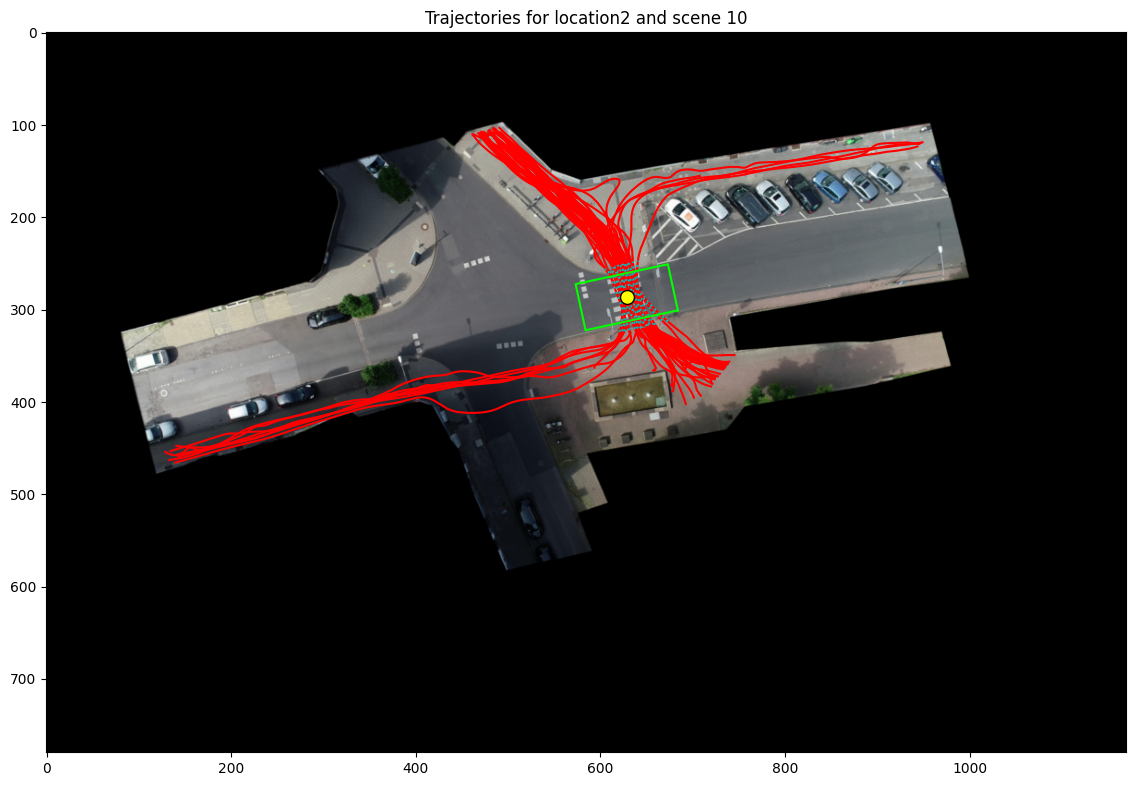

In [17]:
visualizer.showLocationSceneData(sceneData)

In [18]:
scene11Data = loc2data.getSceneData(11, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene11Data)

NameError: name 'loc2data' is not defined

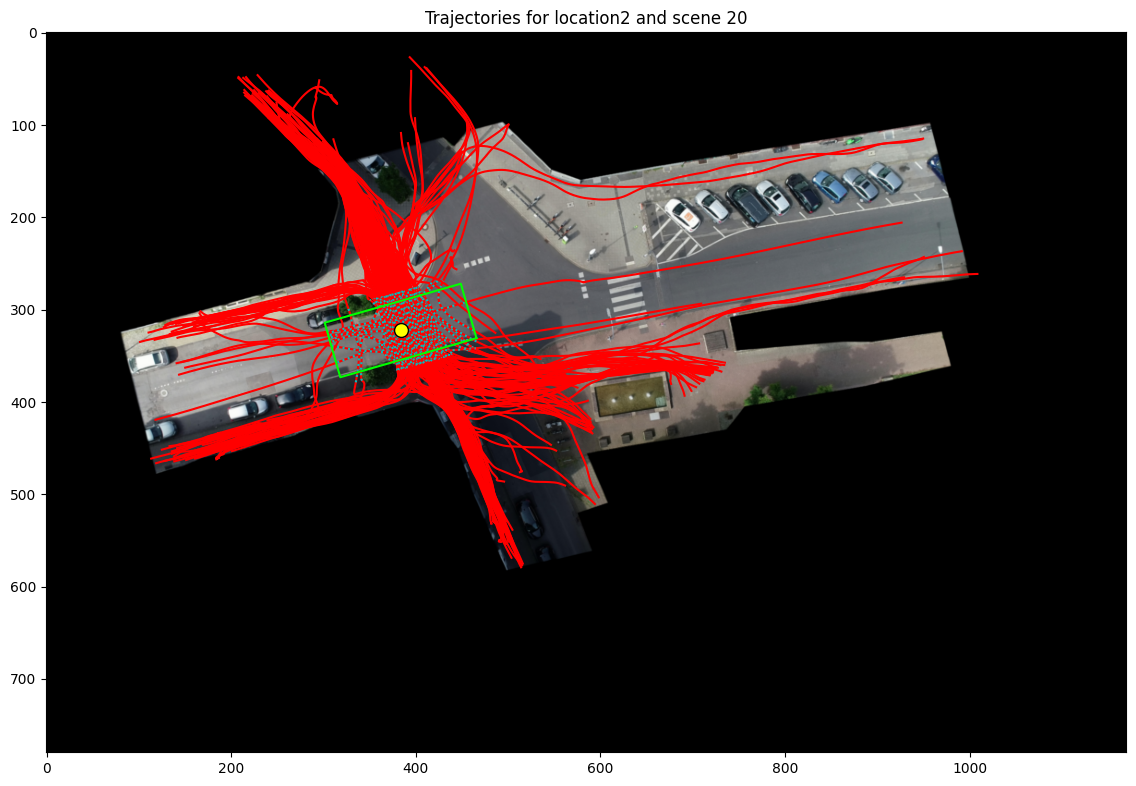

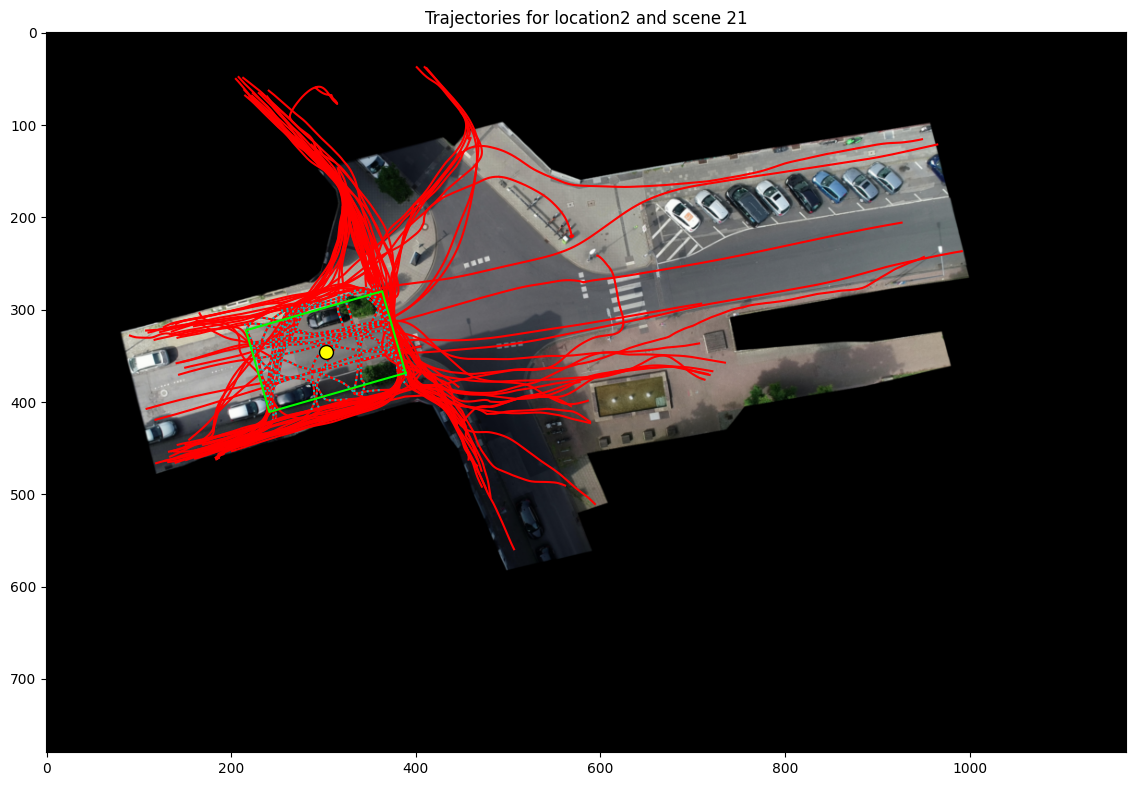

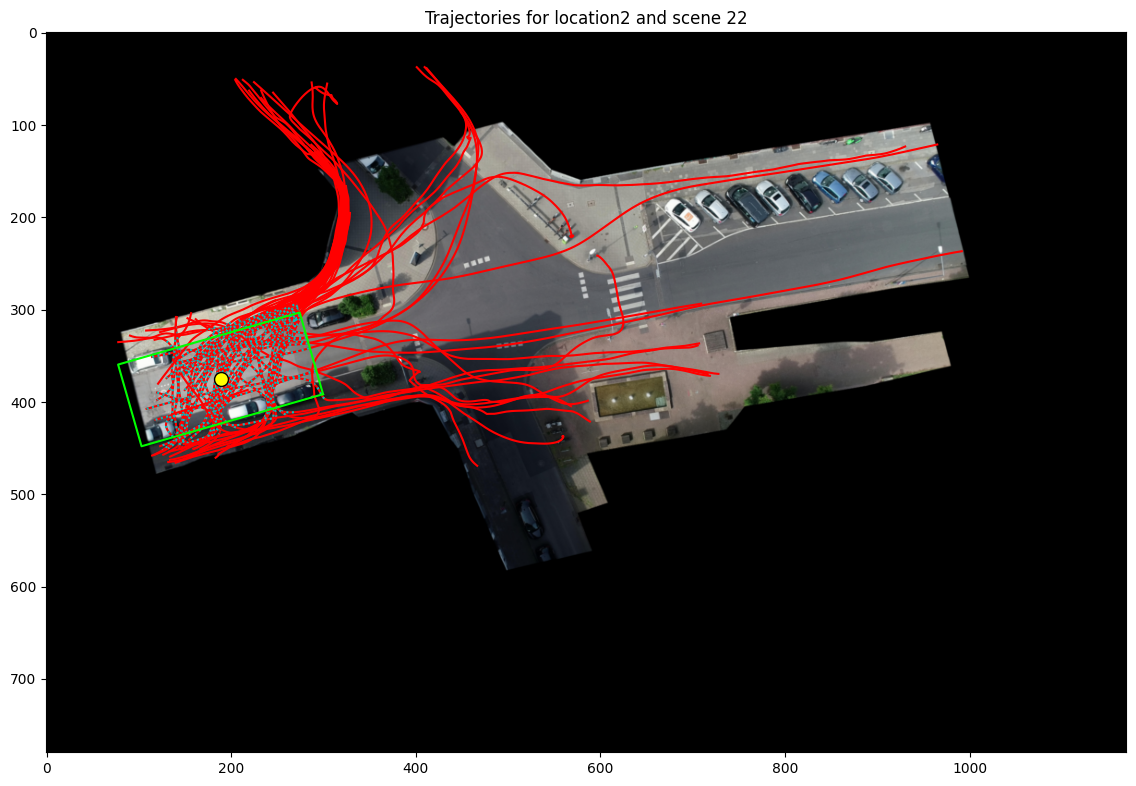

In [19]:
scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

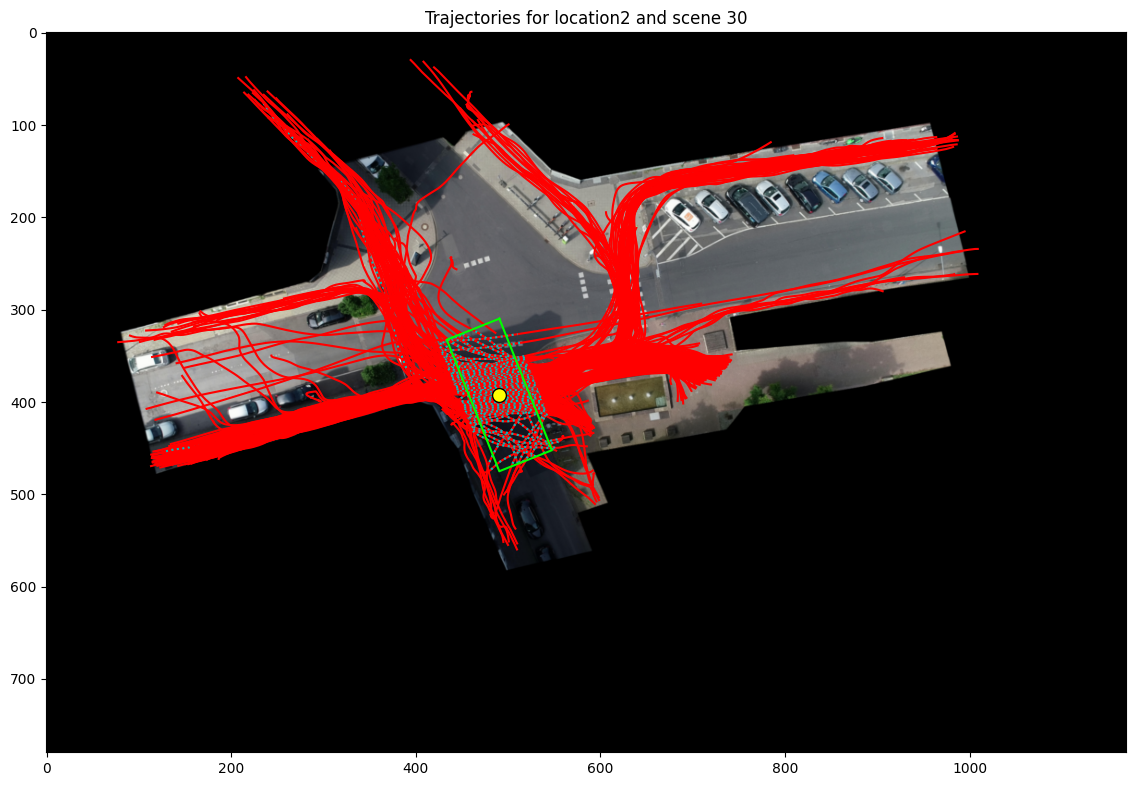

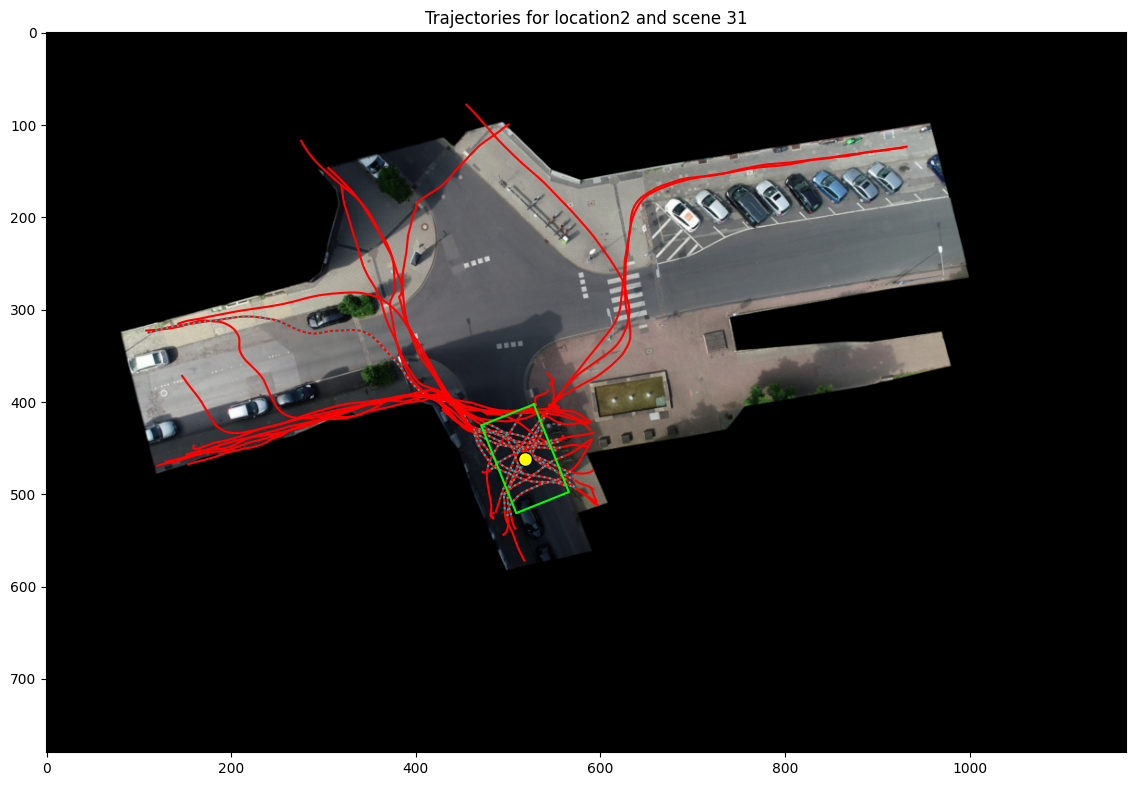

In [20]:
scene30Data = loc2data.getSceneData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

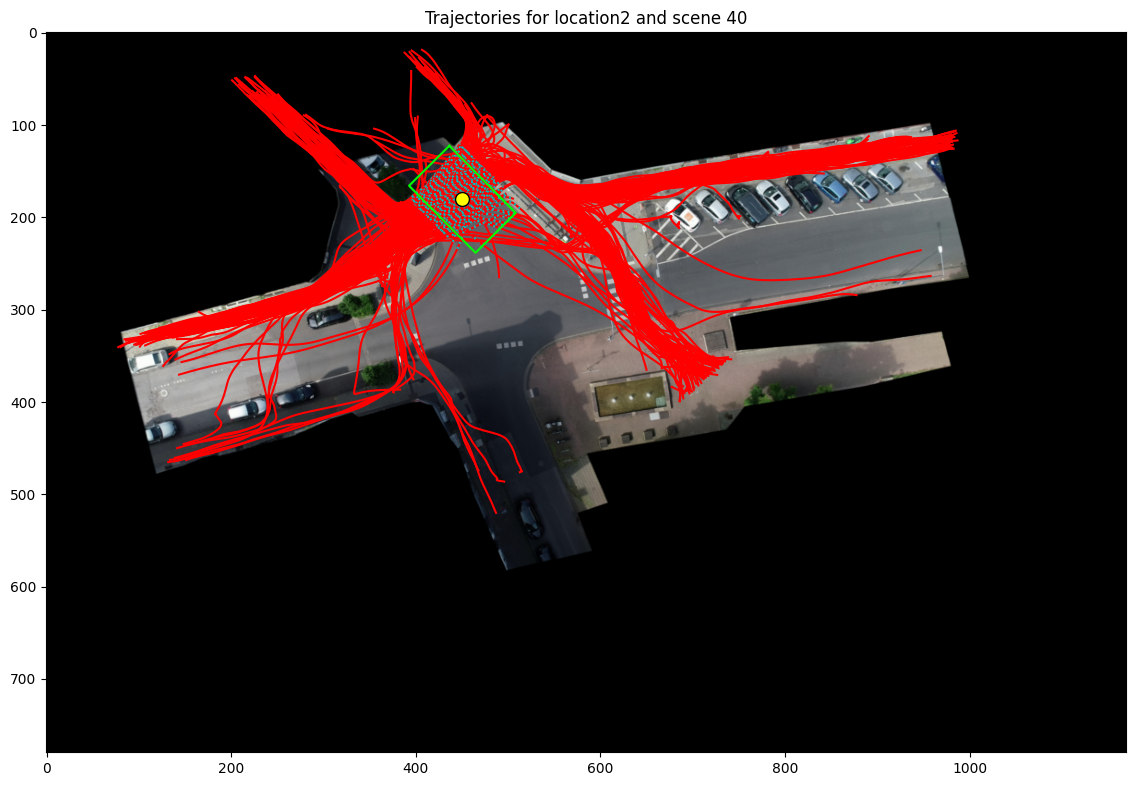

In [21]:
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)